# NLP(初心者向け)　ハンズオン　2022/08/08

### GOAL - 簡単なWord2vecのWEBアプリケーションを作成してみよう！

#### 今日やること。

1.   Google Colaboratoryについて。
2.   Word2vecについて。
3.   Webアプリケーションについて。
4.   Word2Vec-Webアプリケーションの作成。






# １.Google Colaboratoryについて

## 「Googleクラウド上に存在する、Dockerコンテナによる仮想PCインスタンス」　
**（意味が通じる方は本日のサポーターお願いします！）**
<br>
<br>

## 「Googleが提供しているJupyterノートブック実行環境」　
**（矢野の説明がおかしい時は優しく訂正しましょう！）**
<br>
<br>

## 「無料で使えるPython実行環境。とても素敵なWEBツール。」

素晴らしいこと。
*   環境構築が不要
*   GPUが使える
*   基本無料


気を付けること
*   インスタンスの生存期間
*   混んでるとGPUが使えない
*   仕様変更が激しい
*   Colab（コラブ）って呼ばれている

<br>
<br>

### **Colabは基本セル単位で実行する**


# １-１.セクションセル、テキストセル、コードセルを使ってみる

セルの挿入、移動、削除、編集、実行を試してみよう。

In [ ]:
#コードセルではOSコマンドも実行できる
!pwd        # カレントディレクトリの表示
!python -V  # pythonのバージョンを表示

#Pythonコードの実行
print('パイソンプログラムからののPrint文')

# ２．Word2vecについて

Word2vecは、文章中の単語を数値ベクトルに変換してその意味を把握する自然言語処理の手法です。<br>
どうやって数値ベクトルに変換するのか？は複雑なため割愛します。<br>
本日は

*   何故変換するのか？
*   変換すると何ができるのか？

に焦点を解説します。

## （１）なぜ変換するのか？
*   **コンピューター（プログラム）で扱えるようにするため**

## （2）変換すると何ができるのか？
*   **単語を数値ベクトルによって可視化することで数値演算として表現できる**
<br>
<br>

## この応用発展形として文章の解析、変換、予測（生成）が実現可能になる



In [ ]:
#20本ノックより

FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)
model['English'][:50]

In [ ]:
# 単語の演算
model.most_similar(positive=['King', 'female'], negative=['male'], topn=10)

# ３．Webアプリケーションについて

## WEBアプリケーションとは
ざっくり言うと「WEBを利用したアプリケーション」。クライアントにWebブラウザを利用することが多い。
<br>
<br>
<br>
## WEBアプリケーションフレームワークとは
WEBアプリケーションは仕組みが面倒くさい！！→各プログラミング言語毎にフレームワークが存在している。<br>PythonならDjangoやFlaskが有名。<br>
今回は**Streamlit(ｽﾄﾘｰﾑﾘｯﾄ)＋Colab**を利用したWebアプリケーションを作成します。
<br>
<br>
<br>
参考：
[Google ColaboratoryでサクっとStreamlit（最小構成）](https://qiita.com/gudapys/items/62eda02bdb3de5530a23)


In [ ]:
!pip install streamlit

In [ ]:
# app.pyファイルを作成する。
%%writefile app.py
import streamlit as st
st.title("Hello World !")

In [ ]:
# app.pyファイルをエディタで開いておく（編集するとWebアプリケーションに反映される）
from google.colab import files
files.view("/content")
files.view("app.py")

In [ ]:
# Webアプリケーションの起動。your url is:...と表示されたらクリックすると別タブでページが表示される
# 終了するときはこのセルの実行を停止する
!streamlit run app.py & sleep 3 && npx localtunnel --port 8501

# ４．Word2vec-Webアプリケーションの作成

### ブログで紹介した次のアプリケーションを作ります。

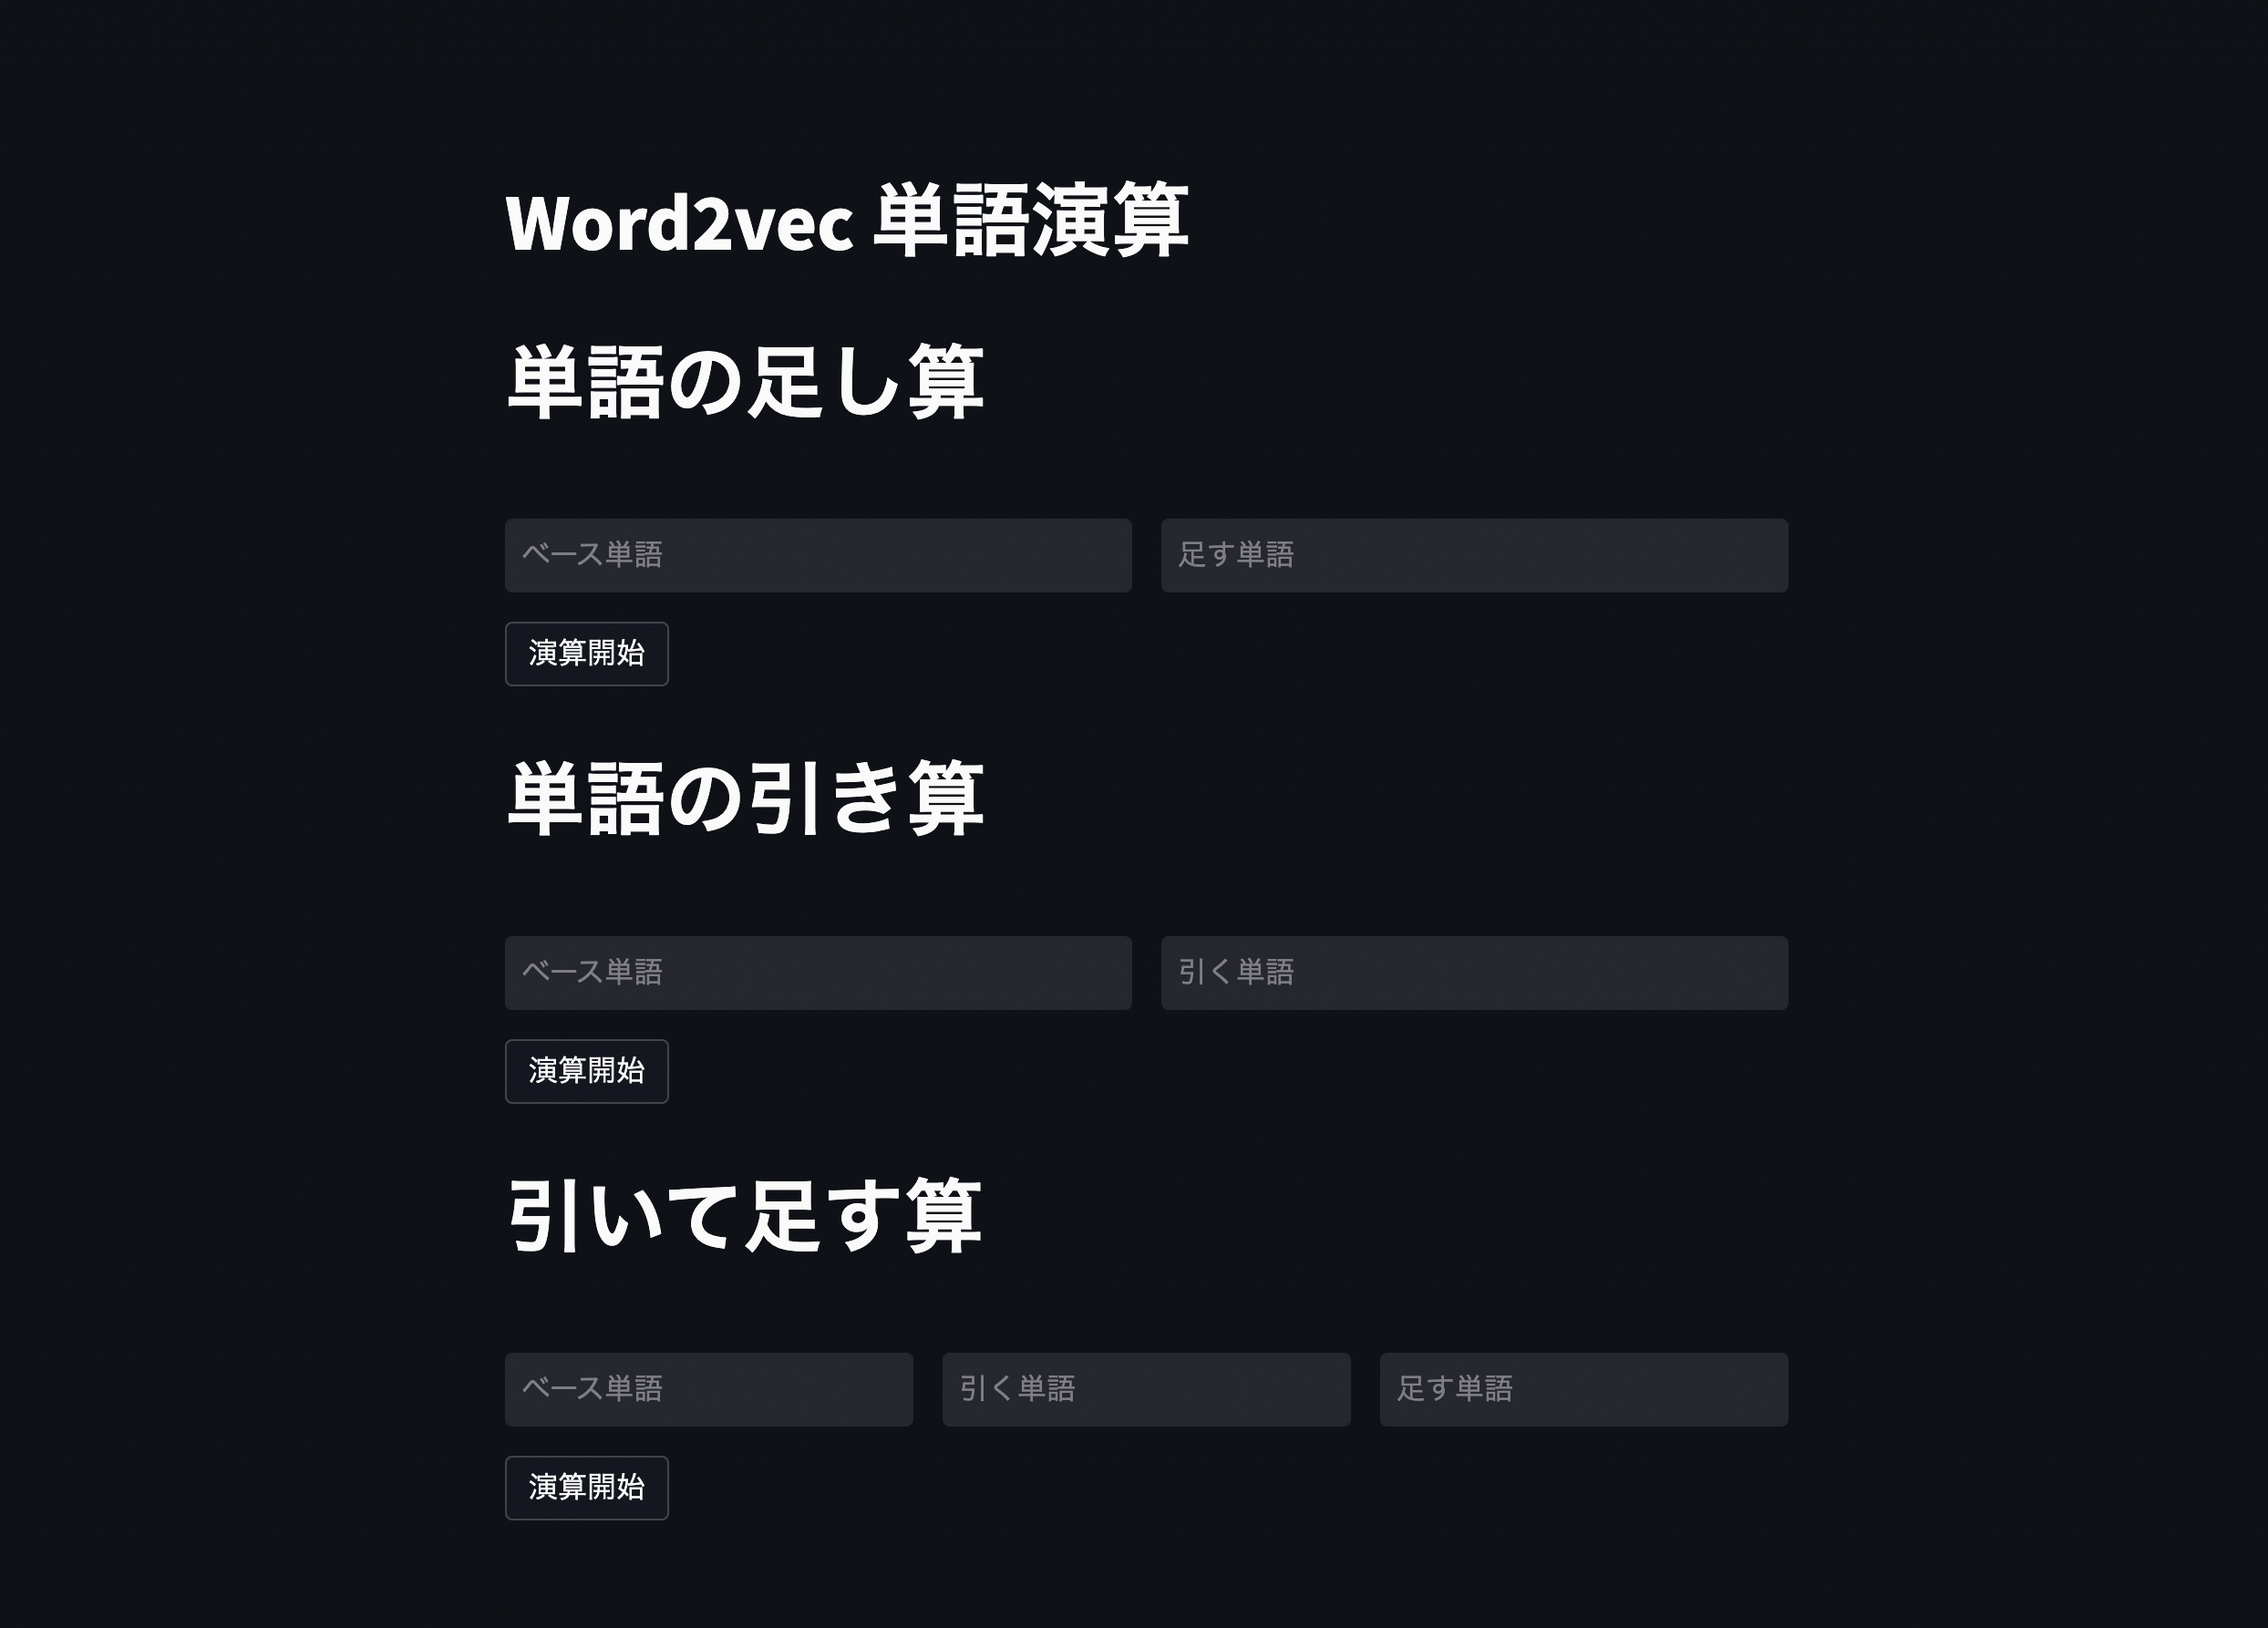

In [ ]:
# app.pyファイルを作成する。
%%writefile nlp_app.py
import streamlit as st
import numpy as np
from PIL import Image
import gensim.downloader as api


# ---------- Word2Vecの読み込み ----------
@st.cache(allow_output_mutation=True)
def load_model():
#    return api.load('word2vec-google-news-300')
#    return api.load('fasttext-wiki-news-subwords-300')
#    return api.load('glove-twitter-50')
    return api.load('glove-wiki-gigaword-100')

wv = load_model()

# ---------- タイトル ----------
st.title("Word2vec 単語演算")

# ---------- 足し算 ----------
st.title("単語の足し算")
col1, col2 = st.columns([1, 1])
col1.text_input("", key="word1_1", placeholder="ベース単語")
col2.text_input("", key="word1_2", placeholder="足す単語")

if st.button("演算開始", key=1):
    if len(st.session_state.word1_1) == 0 or len(st.session_state.word1_2) == 0:
        st.write("入力が足りません")
    else:
        calcStr = wv.most_similar(positive=[st.session_state.word1_1, st.session_state.word1_2], topn=10)
        for i in range(10):
            st.write(str(i+1) + "「" + calcStr[i][0] + "」 スコアは「"+  str(calcStr[i][1]) + "」")

# ---------- 引き算 ----------
st.title("単語の引き算")
col1, col2 = st.columns([1, 1])
col1.text_input("", key="word2_1", placeholder="ベース単語")
col2.text_input("", key="word2_2", placeholder="引く単語")

if st.button("演算開始", key=2):
    if len(st.session_state.word2_1) == 0 or len(st.session_state.word2_2) == 0:
        st.write("入力が足りません")
    else:
        calcStr = wv.most_similar(positive=[st.session_state.word2_1], negative=[st.session_state.word2_2], topn=10)
        for i in range(10):
            st.write(str(i+1) + "「" + calcStr[i][0] + "」 スコアは「"+  str(calcStr[i][1]) + "」")

# ---------- 引いて足す ----------
st.title("引いて足す算")
col1, col2, col3 = st.columns([1, 1, 1])
col1.text_input("", key="word3_1", placeholder="ベース単語")
col2.text_input("", key="word3_2", placeholder="引く単語")
col3.text_input("", key="word3_3", placeholder="足す単語")

if st.button("演算開始", key=3):
    if len(st.session_state.word3_1) == 0 or len(st.session_state.word3_2) == 0 or len(st.session_state.word3_3) == 0:
        st.write("入力が足りません")
    else:
        calcStr = wv.most_similar(positive=[st.session_state.word3_1, st.session_state.word3_3], negative=[st.session_state.word3_2], topn=10)
        for i in range(10):
            st.write(str(i+1) + "「" + calcStr[i][0] + "」 スコアは「"+  str(calcStr[i][1]) + "」")


In [ ]:
# Webアプリケーションの起動。your url is:...と表示されたらクリックすると別タブでページが表示される
# 終了するときはこのセルの実行を停止する
!streamlit run nlp_app.py & sleep 3 && npx localtunnel --port 8501